In [10]:
# 导入数据并查看输入数据样例
import pandas as pd
import numpy as np
train_data = pd.read_csv("News_info_train.txt",sep='\t',header=-1)
train_data.head()

/home/huangdingbang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


,0,1,2
0,D0000001,<title>惠尔新品 | 冷色系实木多层地板系列</title> <p> </p> <b...,P0000001.JPEG;P0000002.JPEG;P0000003.JPEG;P000...
1,D0000002,<title>82周年庆 | 收到八方来贺之第一波(女士专场福利)</title> <p> ...,P0000016.JPEG;P0000017.JPEG;P0000018.JPEG;P000...
2,D0000003,"<title>黄河片区压轴大戏,美林康城铂悦府1月13日优惠升级</title> <p> ...",P0000025.JPEG;P0000026.JPEG;P0000027.JPEG;P000...
3,D0000004,"<title>早安 | 世界上所有的惊喜与好运,都是你积累的人品与善良。</title> <...",P0000032.JPEG;P0000033.JPEG;P0000034.JPEG;P000...
4,D0000005,<title>中文到底有多难?为教马克龙说这句话 翻译差点崩溃</title> 中文到底有多...,NaN


In [2]:
# 导入标签数据并查看样例
tag_data = open("News_pic_label_train.txt",'r',encoding='utf-8').readlines()
tag_data = [int(x.split('\t')[1]) for x in tag_data]
print(len(tag_data),tag_data[0:100],sum(tag_data))

48480 [0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 0] 41629


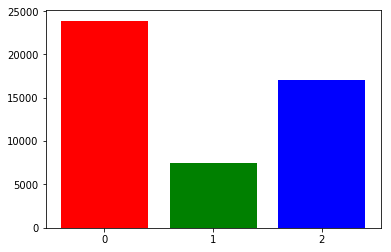

In [7]:
#查看样本标签比例
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
name_list = ['0','1','2']
num0 = [x for x in tag_data if x==0]
num1 = [x for x in tag_data if x==1]
num2 = [x for x in tag_data if x==2]
plt.bar(range(3), [len(num0),len(num1),len(num2)], 
        color='rgb',tick_label=name_list)
plt.show()


In [8]:
from bs4 import BeautifulSoup
# print(train_data[1][1])


In [ ]:
''' 
# 获取段落的文本，但是对于本内容而言不全
from tqdm import tqdm
def getContent(html):
    soup = BeautifulSoup(html,'lxml')
    content = soup.find_all('p')

    text=str(soup.title.string)
    for x in content:
        x = BeautifulSoup(str(x),'lxml').p.string
        if x!=None and len(str(x))>1 :
            text=str(text)+str("；")+str(x)
    return text
content = [getContent(x) for x in tqdm(train_data[1])]
print(len(content),content[0])
'''

In [11]:
# 网页代码中的文本数据
from tqdm import tqdm
content = [BeautifulSoup(x,"lxml").get_text() for x in tqdm(train_data[1])]
print(content[0])

  9%|▊         | 4215/48480 [00:09<01:44, 422.60it/s]/home/huangdingbang/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 48480/48480 [01:59<00:00, 405.79it/s]

惠尔新品 | 冷色系实木多层地板系列    冷色系实木多层系列全新上市  Cool Color Multiply Wood floor WELL FLOOR  在很多人心中,冰冷与阴暗都是冷色系家居设计的标签,因此,人们在装修的时候常常会把它拒之门外。不过近几年来,冷色系再次回归到家装界,也受到了越来越多小资人士的欢迎。冷色系家居之所以能成功逆袭,在于它独特的魅力。    冷色系给人一种安静、沉稳、踏实的感觉,能够营造一个宁静安详的家居氛围,让人们在喧闹的都市生活中回归到安逸愉悦的氛围中。尤其是在情绪火爆或亢奋紧张的时候,置身在冷色系的色彩氛围里,人们便会冷静下来,理智下来,让身体、大脑和心灵一同得到休息和放松。    2017年,惠尔冷色系多层实木地板全新上市!  惠尔2017推出的冷色系多层实木地板系列,由天然桦木材加工制成,纹理直且明显,材质结构细腻而柔和光滑,质地较软或适中。    在木材天然纹理上采用独特的全手工擦色及精细拉丝工艺,使得每一块地板呈现完美质感纹理。    此次推出的新品,采用无醛芯E0环保基材,采用生物大豆胶替代传统的含甲醛胶合剂,让居室时尚精致的同时,更加的环保健康。    表层涂有除醛UV油漆,更进一步防醛控醛,且漆面渗透好,防腐耐磨,与橡木完美附眷,其天然的原木纹理清晰可见,素净而又大气。    惠尔新品实木复合地板采用先进的生产工艺,为地暖环境特别优化,让产品变形细数更低,地暖环境下稳定性更强,冷色却不冷清,让您的一整个冬季温暖无忧!  冷色系实木多层地板全新上市 // 流金玛宝//     // 金色港湾//     // 春意满园//     // 春意盎然//     ▼


In [12]:
# 对文本数据进行分词
import jieba as jb
split_data = [jb.lcut(x) for x in tqdm(content)]


  0%|          | 0/48480 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Dumping model to file cache /tmp/jieba.cache
Dump cache file failed.
Traceback (most recent call last):
  File "/home/huangdingbang/anaconda3/lib/python3.6/site-packages/jieba/__init__.py", line 152, in initialize
    _replace_file(fpath, cache_file)
PermissionError: [Errno 1] Operation not permitted: '/tmp/tmpulaznylf' -> '/tmp/jieba.cache'
Loading model cost 0.742 seconds.
Prefix dict has been built succesfully.
  6%|▌         | 2940/48480 [00:09<02:33, 295.92it/s]/home/huangdingbang/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
100%|██████████| 48480/48480 [02:43<00:00, 296.12it/s]


In [13]:
# 存储以及分好词的数据（因为数据处理需要一定的时间）
import pickle as pk
# print(split_data[0:3])
train_split = open('train_split.pkl','wb')
pk.dump(split_data,train_split)
train_split.close()

31740 2 570.9860148514852 750.5362487277017


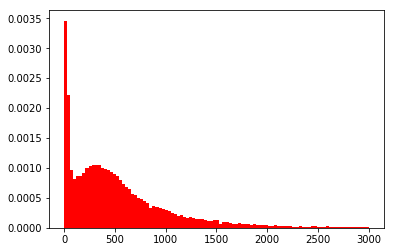

In [17]:
# 分析数据输入文本的长度分布，截取合适长度的文本作为模型输入
len_sent = [len(x) for x in split_data]
print(max(len_sent),min(len_sent),np.mean(len_sent),np.std(len_sent))

#句子长度分布图，由图可看出，大约选择长度1000即可
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(len_sent,bins=100,range=(0,3000),color="red",normed=True)
plt.show()